<a href="https://colab.research.google.com/github/hager2164/tasks_follow/blob/main/LineaerRegressionSingle_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hageryahya","key":"a3dce5444841c59979e85f72a3e4ae82"}'}

In [ ]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!pip install kaggle


In [ ]:
!kaggle datasets download -d omaraymanatia/single-feature-linear-regression-dataset

Dataset URL: https://www.kaggle.com/datasets/omaraymanatia/single-feature-linear-regression-dataset
License(s): CC0-1.0
  0% 0.00/2.10k [00:00<?, ?B/s]
100% 2.10k/2.10k [00:00<00:00, 6.11MB/s]


In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving Data.csv to Data.csv


{'Data.csv': b'Feature,Target\r\n0.8557651149782807,8.058847295845359\r\n1.1735757115025145,11.145303156517784\r\n1.3009242992312315,11.350901002308714\r\n0.10739342014561509,-0.0412331566381684\r\n0.1958751159489334,2.3974742361991632\r\n0.9618121981290269,9.60742910672212\r\n2.287677328221229,21.989112737713885\r\n0.6451895179992251,5.313837483930307\r\n0.03180431948622909,-0.11641985305128422\r\n1.4909208706352761,13.529191969368737\r\n0.5622653045433832,4.79948889397422\r\n0.6565542327560971,5.262530492912322\r\n0.19642069002531937,1.0024244005529606\r\n0.6994717044218387,7.015252140060071\r\n1.0901452564957914,9.165127573904732\r\n1.5140741868148822,13.723004706488405\r\n0.01753469476420021,-0.08480602278694377\r\n0.8315836741357977,7.482806028086003\r\n0.4307156165457197,3.9068944877689233\r\n0.08120071654420759,0.7077084315128515\r\n0.346875501176686,2.415183348672998\r\n1.0039275963897847,10.111051996811787\r\n1.5730561025874636,14.136718246638466\r\n1.1013040438051869,10.29210

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data.csv')

# Take a quick look at the data
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (100, 2)

First few rows:


,Feature,Target
0,0.855765,8.058847
1,1.173576,11.145303
2,1.300924,11.350901
3,0.107393,-0.041233
4,0.195875,2.397474


In [ ]:
import kagglehub
omaraymanatia_single_feature_linear_regression_dataset_path = kagglehub.dataset_download('omaraymanatia/single-feature-linear-regression-dataset')

print('Data source import complete.')


100%|██████████| 2.10k/2.10k [00:00<00:00, 2.66MB/s]

Extracting files...
Data source import complete.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

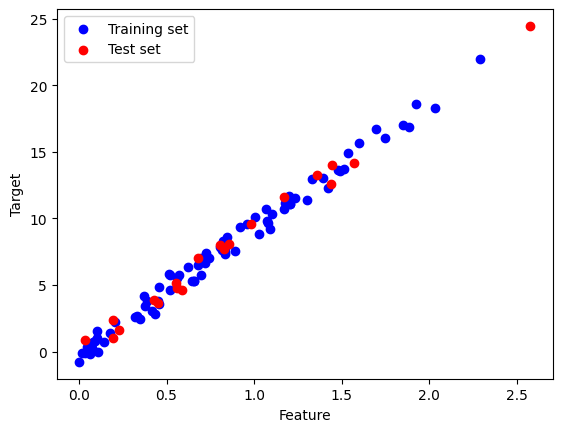

In [ ]:
df = pd.read_csv('/content/Data.csv')

X = df['Feature']
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X_train, y_train, c='blue', label='Training set')
plt.scatter(X_test, y_test, c='red', label = 'Test set')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [ ]:
X_train

,Feature
55,1.391583
88,0.088912
26,0.433386
42,1.694234
69,0.655050
...,...
60,1.333188
71,0.377507
14,1.090145
92,0.175967


In [ ]:
class ScratchLinearRegression:
  def CostFun (self , w,b,data ):
    m= len(data)
    TotalCost =0
    for (index, row ) in data.iterrows():
      x= row['Feature']
      y= row['Target']
      cost = (y-(w*x+b))**2
      TotalCost += cost
    TotalCost /=2*m
    return TotalCost


  def GradientDescent (self , w , b , data , L=0.1) :
    m= len(data)
    w_gradient =0
    b_gradient = 0
    for (index ,row ) in data.iterrows():
       x= row['Feature']
       y= row['Target']
       w_gradient += ((w * x + b) - y) * x
       b_gradient += ((w *x + b) - y)
    w_gradient *= L / m
    b_gradient *= L / m
    w -= w_gradient
    b -= b_gradient
    return w , b
  def predict (self , X,w,b):
    return np.dot(X ,w) +b
  def MSE (self , y_true , y_pred):
    return np.mean ((y_true - y_pred) ** 2)


In [ ]:
X_train  = np.array (X_train).reshape(-1,1)
X_test = np.array (X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [ ]:
LR=LinearRegression()
LR.fit(X_train , y_train)
LR.coef_, LR.intercept_   # view the slope and y-intercept (bias)

(array([[9.49775162]]), array([-0.21477974]))

In [ ]:
# Training
LR=LinearRegression()
LR.fit(X_train , y_train)
coef = LR.coef_
intercept = LR.intercept_

train_pred = LR.predict(X_train)
test_pred = LR.predict(X_test)


Train Mean Squared Error: 0.30832709387186796


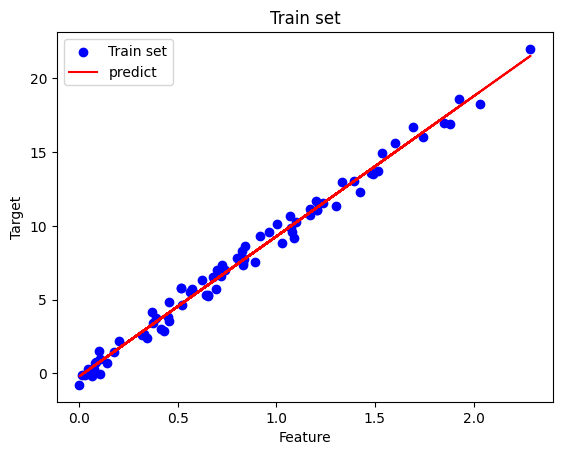

In [ ]:
print(f'Train Mean Squared Error: {mean_squared_error(y_train, train_pred)}')

plt.scatter(X_train, y_train, c='blue', label='Train set')
plt.plot(X_train, train_pred, c='red', label='predict')
plt.title('Train set')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

Test Mean Squared Error: 0.2981464755257683


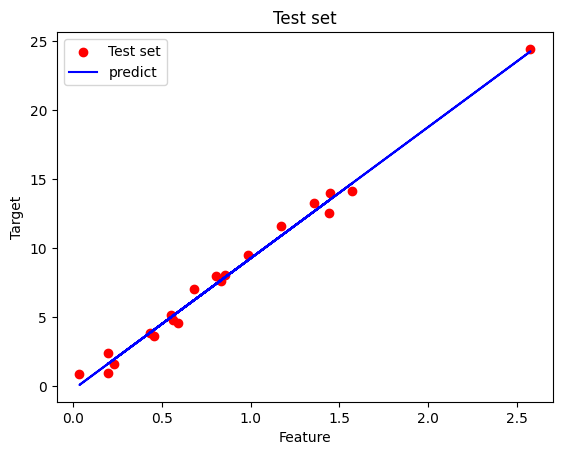

In [ ]:
print(f'Test Mean Squared Error: {mean_squared_error(y_test, test_pred)}')
plt.scatter(X_test, y_test, c='red', label='Test set')
plt.plot(X_test, test_pred, c='blue', label='predict')
plt.title('Test set')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()